In [1]:
import numpy as np
import requests
import matplotlib.pyplot as plt

raw_data = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data').text
raw_data = raw_data.replace(", ", ",")
data = raw_data.split("\n") 
dataset = np.loadtxt(data, dtype=str, encoding=str, delimiter=',')

Create the masks that we will run against the dataset

In [2]:
mmask = dataset[:, 3] == 'Masters'
dmask = dataset[:, 3] == 'Doctorate'
bmask = dataset[:, 3] == 'Bachelors'
bmask.sum()  # number of bachelor degrees

5355

Now we want to create a view with our masks.

In [3]:
educated = dataset[bmask | dmask | mmask]  # a view of the data based on OR comparison of True values in the mask
educated.shape  # number of all those in all three masks

(7491, 15)

And then we want to further compare based on income. Use the same mask technique

In [4]:
lowinc = educated[:, 14] == '<=50K'  # note: you have to use educated, not dataset, or the row counts don't match
educated[lowinc].shape

(4005, 15)

In [5]:
highinc = educated[:, 14] == '>50K'
educated[highinc].shape

(3486, 15)

Make sure we're not missing anyone!

In [6]:
assert educated.shape[0] == educated[highinc].shape[0] + educated[lowinc].shape[0]

Let's try grouping by occupation and seeing the counts

In [7]:
lowinc_edu = educated[lowinc]
highinc_edu = educated[highinc]
highinc_edu_data = np.unique(highinc_edu[:, 6], return_counts=True)
highinc_edu_data

(array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
        'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
        'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
        'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
        'Transport-moving'], dtype='<U26'),
 array([  74,  144,    1,   99, 1201,   25,   11,   20,   31,    1, 1231,
          63,  467,   99,   19]))

Graph it!

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

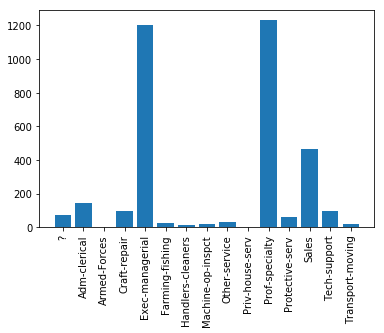

In [8]:
plt.bar(*highinc_edu_data)
plt.xticks(rotation=90)  

And now do an income breakdown by marital status

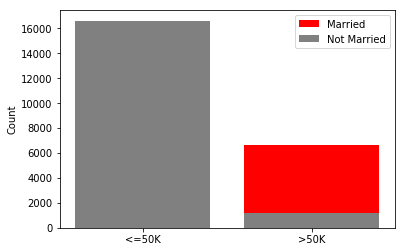

In [9]:
husband_mask = dataset[:, 7] == 'Husband'
wife_mask = dataset[:, 7] == 'Wife'
married = husband_mask | wife_mask
plt.bar(*np.unique(dataset[married, 14], return_counts=True), color='red', label="Married")
plt.bar(*np.unique(dataset[~married, 14], return_counts=True), color='gray', label="Not Married")
plt.ylabel('Count')
plt.legend(loc='best')